In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

import seaborn as sns

# These are some parameters to make figures nice (and big)
xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 12, 6
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [2]:
path_in= '/data/keeling/a/cristi/a/data/ERA5_JJA_hourly/'
path_out='/data/keeling/a/cristi/a/processed_data/ERA5_JJA_daily/'
f1=path_out+'ERA5_JJA_daily_1979-2020_2m_temperature.nc'
f2=path_out+'ERA5_JJA_daily_1979-2020_volumetric_soil_water_layer_1.nc'

In [3]:
swv=ds.swvl1
temp=ds.t2m


t99= np.percentile(temp,99)
t95= np.percentile(temp,95)

m95= np.percentile(swv,20)


heatwaves=swv[temp>t99]
FREQ=100-int(len(heatwaves[heatwaves>m95])/len(heatwaves)*100)


NameError: name 'ds' is not defined

In [ ]:
#title='Wichita KS'
#lat=37.68
#lon=360-97.33


#title='Washington DC'
#lat=38.9
#lon=360-77.0

#title='Atlanta'
#lat=33.74
#lon=360-84.4

title='DOE SGP ARM'
lat=36.6
lon=360-97.5

#title='Dallas'
#lat=32.77
#lon=360-96.8


#title='Denver CO'
#lat=39.7
#lon=360-104.99



#title='Chicago IL'
#lat=41.9
#lon=360-87.6

#title='Minneapolis '
#lat=39.7
#lon=360-104.99

#title='Seattle WA'
#lat=47.6
#lon=360-122.3

#title='Las Vegas'
#lat=36.17
#lon=360-115.13

#title='Los Angeles CA'
#lat=34.05
#lon=360-118.24

#title='Paris, France'
#lat=48.85
#lon=2.35

#title='Bucharest, Ro'
#lat=44.44
#lon=26.10


#title='New York, NY'
#lat=40.71
#lon=360-74.00


ds1=xr.open_dataset(f1).sel(latitude=lat,longitude=lon,method='nearest').load()
ds2=xr.open_dataset(f2).sel(latitude=lat,longitude=lon,method='nearest').load()
ds=xr.merge([ds1,ds2])

swv=ds.swvl1
temp=ds.t2m


t99= np.percentile(temp,99)
t95= np.percentile(temp,95)

m95= np.percentile(swv,20)
#swv=ds.swvl1.resample(time="14D").mean()
#temp =temp.resample(time="14D").mean()


fig,ax=plt.subplots(1,figsize=[10,10])
plt.plot(swv,temp,'o');
plt.plot(swv[temp>t95],temp[temp>t95],'o',label='T>95%');
plt.plot(swv[temp>t99],temp[temp>t99],'ro',label='T>99%');
plt.vlines(m95,np.min(temp),np.max(temp),label='V - 20%')
plt.legend()
plt.xlabel('Volumetric Soil Water (layer 1)');
plt.ylabel('Temperature');
plt.title(title)



Js=np.arange(0,95,5);
T=np.zeros(np.size(Js))
SWV=np.percentile(swv,Js+2.5)
for j in range(len(Js)):
    tmp=ds.t2m.where(ds.swvl1>np.percentile(swv,0+Js[j])).where(ds.swvl1<np.percentile(swv,5+Js[j]))
    T[j]=tmp.mean().values

    
plt.plot(SWV,T,'r')
heatwaves=swv[temp>t99]
FREQ=100-int(len(heatwaves[heatwaves>m95])/len(heatwaves)*100)



m=(SWV-np.min(SWV))/(np.max(SWV)-np.min(SWV))
Tm=15/(1+1*m)+290
plt.plot(SWV,Tm)
print(FREQ)

### fig,ax=plt.subplots(1,figsize=[10,10])

plt.plot(m,Tm)

In [ ]:
fig=plt.figure(figsize=[20,12])
g = sns.jointplot(data=ds.where(ds.swvl1<np.percentile(swv,20)), x="swvl1", y="t2m",kind='hex',ratio=5)
g.plot_joint(sns.kdeplot, zorder=1, levels=10)
g.plot_marginals(sns.rugplot, color="r", height=.05, clip_on=False)
#plt.ylim(280,305)
#plt.xlim(0.25,0.26)

In [ ]:
fig=plt.figure(figsize=[20,12])
g = sns.jointplot(data=ds, x="swvl1", y="t2m",kind='hex',ratio=5)
g.plot_joint(sns.kdeplot, zorder=1, levels=10)
g.plot_marginals(sns.rugplot, color="r", height=.05, clip_on=False)
#plt.ylim(280,305)
#plt.xlim(0.1,0.5)

In [ ]:
0.26*len(swv)

In [ ]:
temp2=temp[swv<m95]


In [ ]:
ds1=xr.open_dataset(f1).sel(latitude=lat,longitude=lon,method='nearest').load()
ds2=xr.open_dataset(f2).sel(latitude=lat,longitude=lon,method='nearest').load()
ds=xr.merge([ds1,ds2])

swv=ds.swvl1
temp=ds.t2m


t99= np.percentile(temp,99)
t95= np.percentile(temp,95)

m95= np.percentile(swv,20)


In [4]:
#swv =ds.swvl1.rolling(time=24, center=True).mean().dropna("time")
#temp=ds.t2m.rolling(time=24, center=True).mean().dropna("time")

swv=ds.swvl1
temp=ds.t2m



#swv=ds.swvl1.resample(time="1D").mean()
#temp =t2m.resample(time="1D").mean()

xl=0


fig,ax=plt.subplots(2,1,figsize=[10,10])
ax[0].plot(temp,'o-')
ax[0].set_xlim(xl,xl+150)

ax[1].plot(swv,'o-')
ax[1].set_xlim(xl,xl+150)

NameError: name 'ds' is not defined

In [5]:
ds=xr.merge([xr.load_dataset('/data/keeling/a/cristi/a/scratch/Temp2m.nc'),
              xr.load_dataset('/data/keeling/a/cristi/a/scratch/SoilWater.nc')])

ds=ds.mean(['latitude','longitude','expver'])
#t2m=ds.t2m.groupby('time.month')-ds.t2m.groupby('time.month').mean('time') 
ds

<xarray.Dataset>
Dimensions:  (time: 94944)
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 ... 2021-08-31T23:00:00
Data variables:
    t2m      (time) float32 295.2 294.7 294.8 289.9 ... 308.8 309.6 308.9 308.5
    swvl1    (time) float32 0.2148 0.2143 0.2141 0.214 ... 0.1646 0.169 0.1684

Text(0, 0.5, 'Temperature')

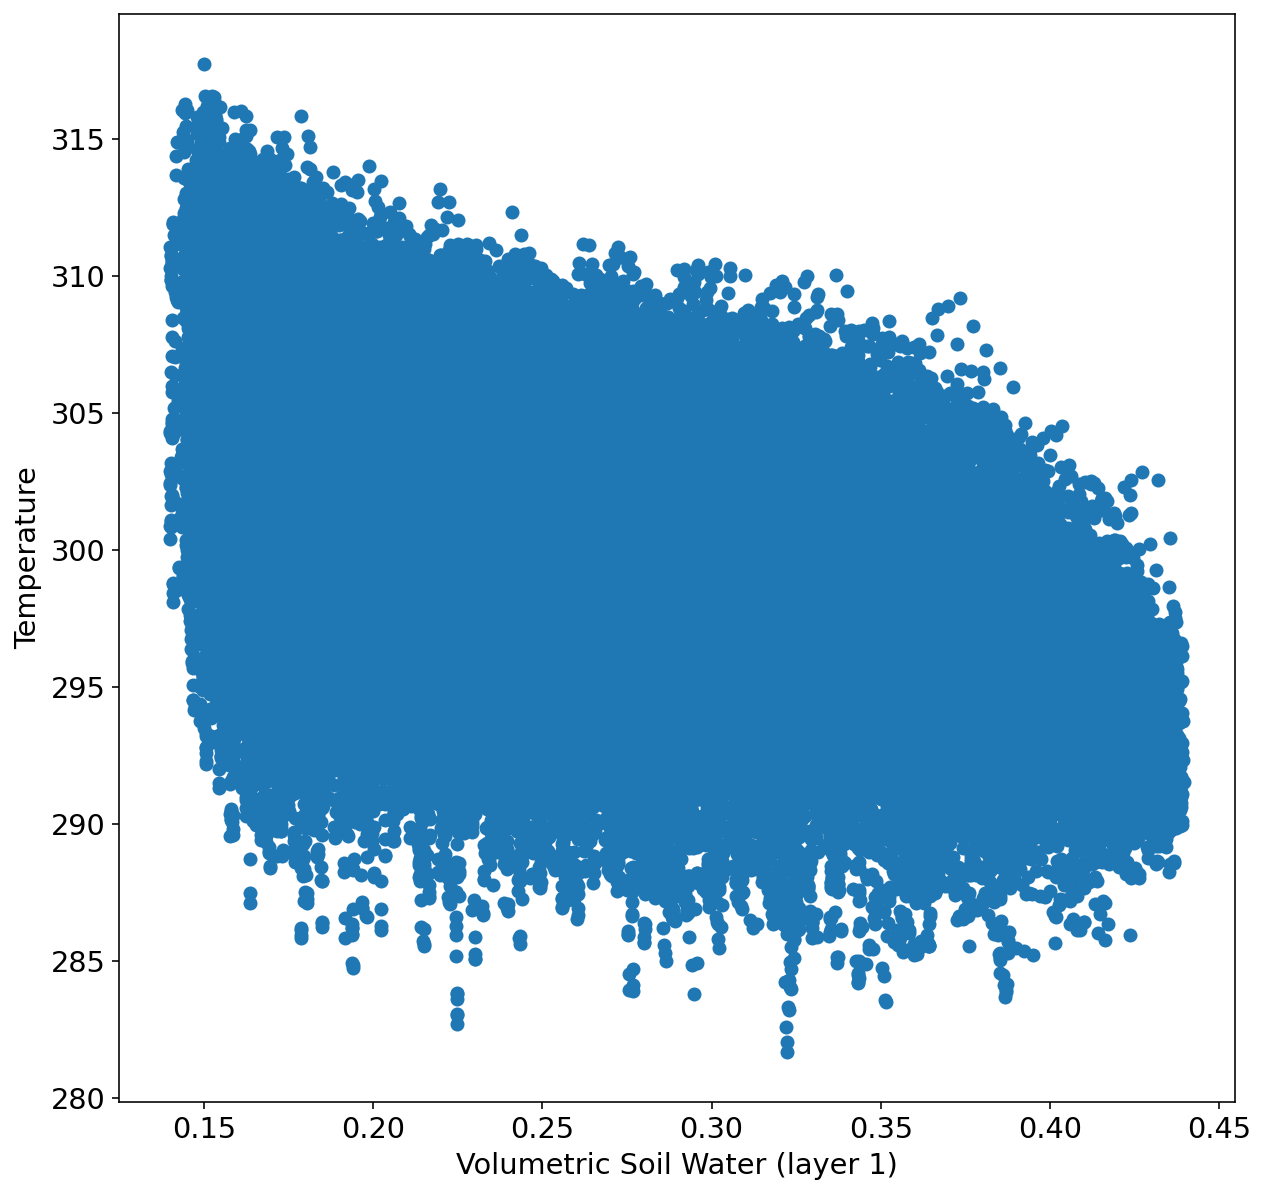

In [6]:
#swv =ds.swvl1.rolling(time=1, center=True).mean()
#temp=ds.t2m.rolling(time=1, center=True).mean()



#swv=ds.swvl1.resample(time="1D").mean().rolling(time=1, center=True).mean()
#temp =ds.t2m.resample(time="1D").mean().rolling(time=1, center=True).mean()

swv=ds.swvl1
temp=ds.t2m

fig,ax=plt.subplots(1,figsize=[10,10])
plt.plot(swv,temp,'o')
plt.xlabel('Volumetric Soil Water (layer 1)')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

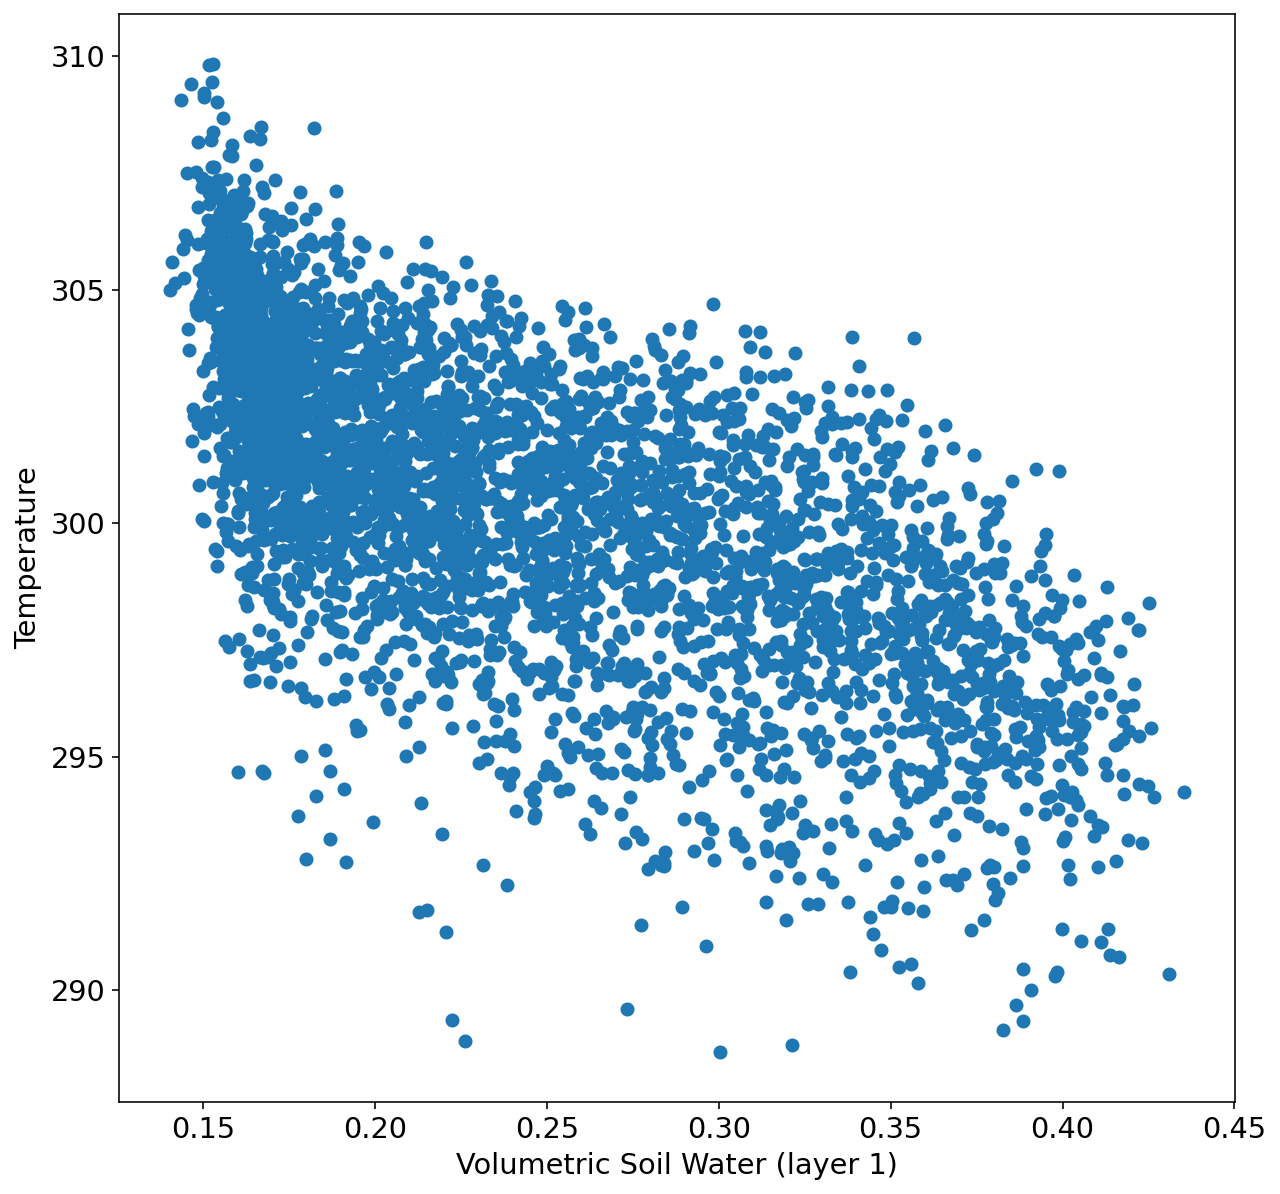

In [7]:
#swv =ds.swvl1.rolling(time=1, center=True).mean()
#temp=ds.t2m.rolling(time=1, center=True).mean()



swv=ds.swvl1.resample(time="1D").mean().rolling(time=1, center=True).mean()
temp =ds.t2m.resample(time="1D").mean().rolling(time=1, center=True).mean()

#swv=ds.swvl1
#temp=ds.t2m

fig,ax=plt.subplots(1,figsize=[10,10])
plt.plot(swv,temp,'o')
plt.xlabel('Volumetric Soil Water (layer 1)')
plt.ylabel('Temperature')

(4380.0, 7980.0)

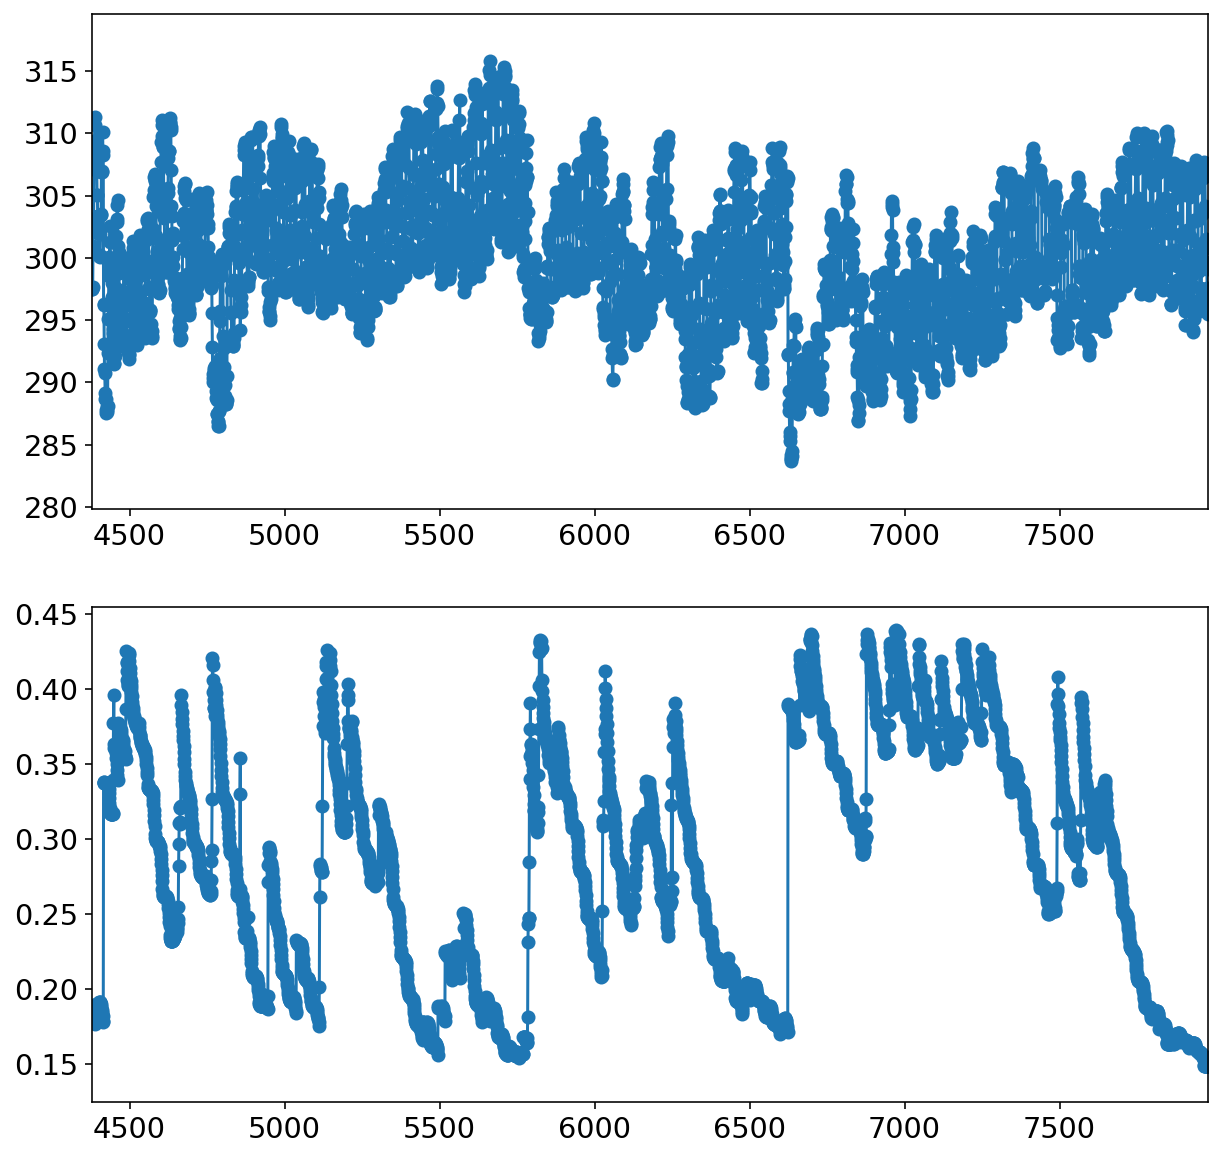

In [8]:

#swv =ds.swvl1.rolling(time=24, center=True).mean().dropna("time")
#temp=ds.t2m.rolling(time=24, center=True).mean().dropna("time")

swv=ds.swvl1
temp=ds.t2m



#swv=ds.swvl1.resample(time="1D").mean()
#temp =t2m.resample(time="1D").mean()

xl=365*12


fig,ax=plt.subplots(2,1,figsize=[10,10])
ax[0].plot(temp,'o-')
ax[0].set_xlim(xl,xl+150*24)

ax[1].plot(swv,'o-')
ax[1].set_xlim(xl,xl+150*24)

In [9]:
fname='/data/keeling/a/cristi/a/data_tmp/dewpt_temp_netsolar_sens_downsolar_totevap_mois.nc'
ds=xr.open_dataset(fname)

In [ ]:
ds

In [ ]:
ds.time